In [66]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
import numpy as np
from keras import backend as K



In [67]:
X_array = np.load('ip_sequences_new_10.npy')
Y_array = np.load('y_array_new_10.npy')

In [68]:
X_array.shape

(23929, 10, 7)

In [69]:
y_ne= np.load('y_array_new_10.npy')

print(y_ne.shape)
ones=0
for item in y_ne:
    if item[0] == 1:
        ones += 1
print(ones)

(23929, 1)
1275


In [70]:
np.isnan(np.sum(X_array))

False

In [71]:
X_array.shape

(23929, 10, 7)

In [72]:
X_array=np.delete(X_array,[6], axis=2)
X_array=np.delete(X_array,[3], axis=2)

In [73]:
X_array

array([[[1.738000e-01, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00],
        [1.740000e-01, 0.000000e+00, 0.000000e+00, 2.149000e-01,
         0.000000e+00],
        [1.742000e-01, 0.000000e+00, 0.000000e+00, 2.139000e-01,
         0.000000e+00],
        ...,
        [1.751000e-01, 0.000000e+00, 0.000000e+00, 5.816000e-01,
         0.000000e+00],
        [1.753000e-01, 0.000000e+00, 0.000000e+00, 2.129000e-01,
         0.000000e+00],
        [1.755000e-01, 0.000000e+00, 0.000000e+00, 2.154000e-01,
         0.000000e+00]],

       [[1.757000e-01, 0.000000e+00, 0.000000e+00, 2.133000e-01,
         0.000000e+00],
        [1.759000e-01, 0.000000e+00, 0.000000e+00, 5.816000e-01,
         0.000000e+00],
        [1.761000e-01, 0.000000e+00, 0.000000e+00, 2.130000e-01,
         0.000000e+00],
        ...,
        [1.770000e-01, 0.000000e+00, 0.000000e+00, 2.158000e-01,
         0.000000e+00],
        [1.772000e-01, 0.000000e+00, 0.000000e+00, 2.136000e-01,
         0.000000

In [74]:
def min_max_normalization(new_X_array):
    new_x= np.zeros(new_X_array.shape)

    for i in range(new_X_array.shape[2]):
        
        min_val = new_X_array[0][0][i]
        max_val= new_X_array[0][0][i]
        for array in new_X_array:
            for item in array:
                if item[i] < min_val:
                    min_val = item[i]
                if item[i] > max_val:
                    max_val = item[i]

        for j, array in enumerate(new_X_array):
            for k, item in enumerate(array):
                new_x[j][k][i] = (item[i] - min_val) / (max_val - min_val)
                #x_test[j][k][i] = item[i]
    
    return new_x
    

In [75]:
new_x = min_max_normalization(X_array)
new_x.shape

(23929, 10, 5)

In [76]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(new_x, Y_array, test_size=0.33, shuffle= True, stratify=Y_array)

In [77]:
print(np.count_nonzero(Y_array == 1))

1275


In [78]:
model = keras.Sequential()
model.add(layers.LSTM(8,return_sequences=True, input_shape=(new_x.shape[1], new_x.shape[2]), activation='relu'))
model.add(layers.LSTM(8, activation='relu'), )
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 10, 8)             448       
_________________________________________________________________
lstm_11 (LSTM)               (None, 8)                 544       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [79]:
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [80]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy', 'Precision', 'Recall', f1_m])

In [81]:
history = model.fit(x_train, y_train, epochs=50, batch_size=512,
                    validation_data=(x_valid, y_valid))

Epoch 1/50
32/32 [==============================] - 2s 21ms/step - loss: 0.5028 - accuracy: 0.9715 - precision: 0.9287 - recall: 0.5133 - f1_m: 0.6469 - val_loss: 0.0885 - val_accuracy: 0.9839 - val_precision: 0.9249 - val_recall: 0.7601 - val_f1_m: 0.8267
Epoch 2/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0756 - accuracy: 0.9846 - precision: 0.9378 - recall: 0.7458 - f1_m: 0.8302 - val_loss: 0.0654 - val_accuracy: 0.9842 - val_precision: 0.9253 - val_recall: 0.7648 - val_f1_m: 0.8301
Epoch 3/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0622 - accuracy: 0.9848 - precision: 0.9421 - recall: 0.7509 - f1_m: 0.8315 - val_loss: 0.0592 - val_accuracy: 0.9851 - val_precision: 0.9268 - val_recall: 0.7815 - val_f1_m: 0.8409
Epoch 4/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0573 - accuracy: 0.9852 - precision: 0.9358 - recall: 0.7842 - f1_m: 0.8512 - val_loss: 0.0588 - val_accuracy: 0.9851 - val_precision: 0.9268 - val_recall: 0

In [82]:
model.predict(x_valid[0].reshape(1,x_valid[0].shape[0], x_valid[0].shape[1]))

array([[0.00378907]], dtype=float32)

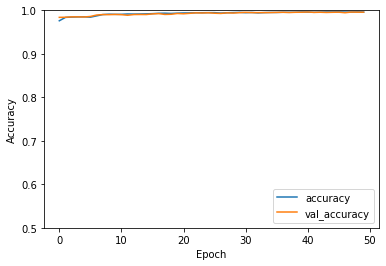

In [83]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(x_valid, y_valid, verbose=2)


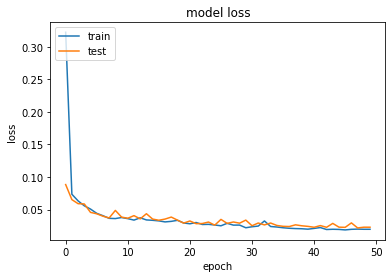

In [84]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

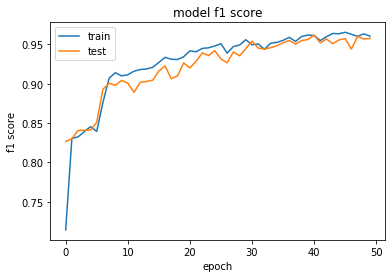

In [85]:
# summarize history for f1 score
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('model f1 score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()